# Project : Medical Appointment No Shows Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments inBrazil and is focused on the questionof whether or not patients show up for their appointment , we will try to predict what the most important factors that let us know if the patient will show up or not , we have the dependent variable as the show up and the independent varaibles are the gender , age ..etc till end.

#### here are all the packages that i need in this nootbook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [21]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> we see that there's no missing values in the dataset

In [23]:
df.shape

(110527, 14)

In [24]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
df['Age'].value_counts() 

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

> we see that there is a " -1 " age and that is impossible we will drop this value.

In [3]:
df = df[(df.Age >= 0)]

> so 0 age mean mostly that they are babies so there are no babies alcoholism we will check that

In [4]:
df[(df.Age <= 0) & (df.Alcoholism == 1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> we see the value counts for every factor

In [27]:
df['Gender'].value_counts() 

F    71839
M    38687
Name: Gender, dtype: int64

In [28]:
df['Scholarship'].value_counts() 

0    99665
1    10861
Name: Scholarship, dtype: int64

In [29]:
df['Hipertension'].value_counts() 

0    88725
1    21801
Name: Hipertension, dtype: int64

In [21]:
df['Diabetes'].value_counts() 

0    102584
1      7943
Name: Diabetes, dtype: int64

In [30]:
df['Alcoholism'].value_counts() 

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [23]:
df['Handcap'].value_counts() 

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [31]:
df['SMS_received'].value_counts() 

0    75044
1    35482
Name: SMS_received, dtype: int64

In [32]:
df['No-show'].value_counts() 

No     88207
Yes    22319
Name: No-show, dtype: int64

> a histogram for every factor tha we can understand the flow of the data

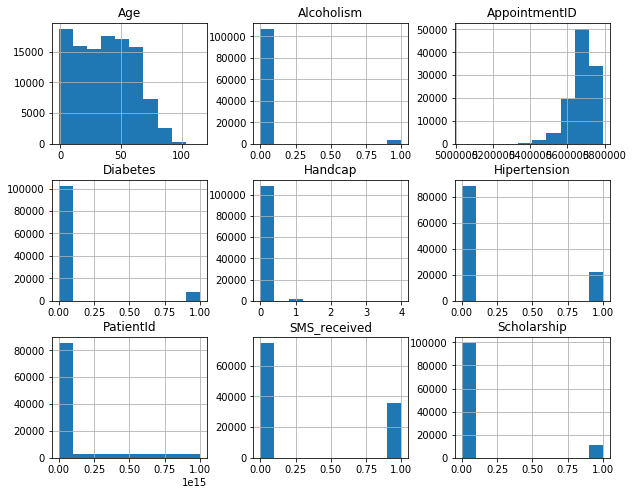

In [10]:
df.hist(figsize=(10,8));

In [33]:
df.isnull().sum().any()


False

In [34]:
df.duplicated().sum()

0

> there are no null values in dataset and there are no dublicates

In [95]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

> we will change the scheduleday and appointmentday to datatime type so can we work with it.

In [6]:
df.drop(['PatientId','AppointmentID'],axis=1 , inplace=True)

>we will drop the patient id and the app id as we dont need it in the analysis.

In [38]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> First we will to check the probability of showing to the appointment or not to every factor.

In [45]:
df['Gender'].value_counts() 


F    71839
M    38687
Name: Gender, dtype: int64

> so we hace a 71k female and 38 male in the dataset

In [46]:
df['No-show'].value_counts() 

No     88207
Yes    22319
Name: No-show, dtype: int64

> 88k are showed up in the appointment and 22k are not

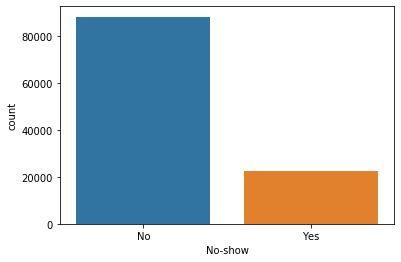

In [57]:
ax = sns.countplot(x='No-show', data=df)

## First Part
### 1. we will check the Gender factor with showing up.

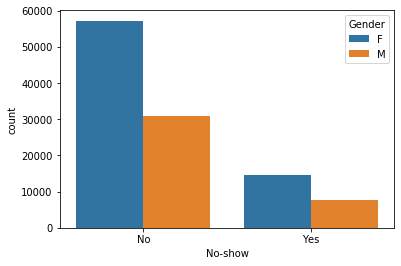

In [58]:
ax = sns.countplot(x="No-show", hue="Gender", data=df)


> we see that the females have more appointments but the probabilty is so close to same between the number of appointments and the gander

### 2. we will check the Age factor with showing up.


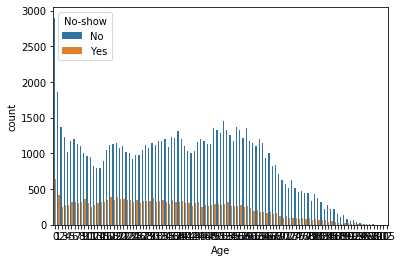

In [96]:
g.figzie=(30,10)
g = sns.countplot(x="Age", hue="No-show" ,data=df)

> we see that most of the ages gorups attend the appointments only 0/1 age is kinda have higher ratio

### 3. we will check the Neighbourhood factor with showing up.


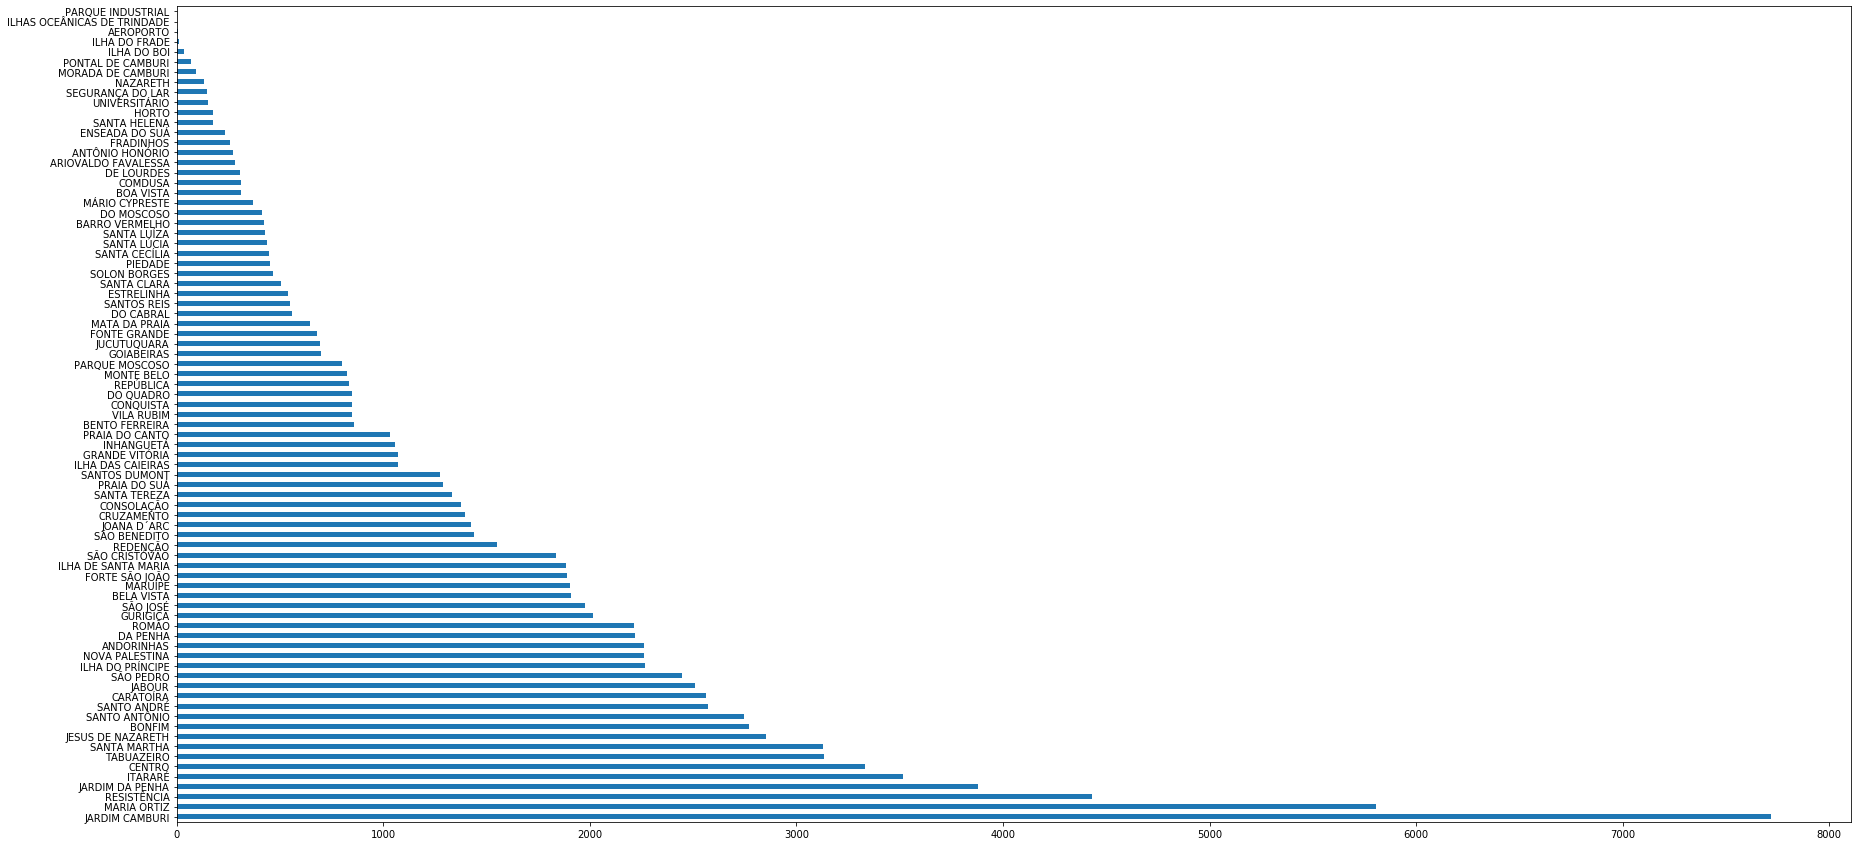

In [119]:
df['Neighbourhood'].value_counts().plot(kind='barh',figsize=(30,15))

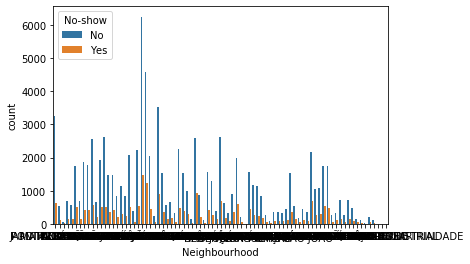

In [132]:
g.figzie=(30,10)
g = sns.countplot(x="Neighbourhood", hue="No-show" ,data=df)

> we understand the we have the same ratio as before that about 75 or 80% attend the appointmens.

### 4. we will check the Scholarship factor with showing up.


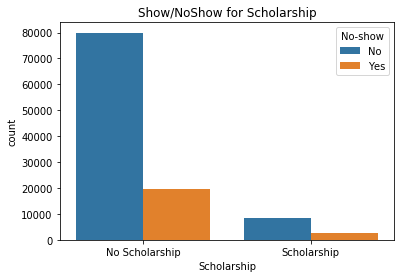

In [137]:
ax = sns.countplot(x='Scholarship', hue='No-show', data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

> we can see that about 80k attened their appointments without have a scholarship but more than 50% that have a scholarship attened their appointments also so scholarship will helpus to predict of showing up

### 5. we will check the Hipertension factor with showing up.


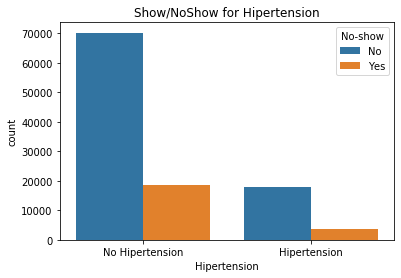

In [76]:
ax = sns.countplot(x='Hipertension', hue='No-show', data=df)
ax.set_title("Show/NoShow for Hipertension")
x_ticks_labels=['No Hipertension', 'Hipertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

> we see that alot of patients that dont have a Hipertension has come ti their appoitnments and areound 70% of the patienst that have a Hipertension has come to their appointments

### 6. we will check the Diabetes factor with showing up.


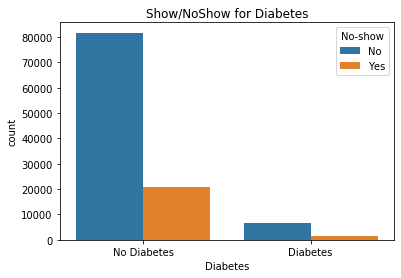

In [77]:
ax = sns.countplot(x='Diabetes', hue='No-show', data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

> we see that around 75% patients without diabetes showed up and about 80% that have diabetes showed up too.

### 7. we will check the Alcoholism factor with showing up.


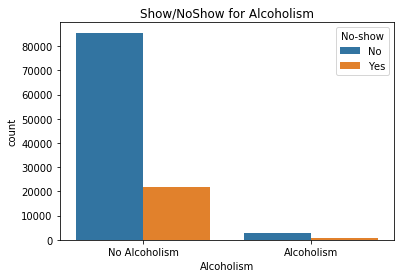

In [78]:
ax = sns.countplot(x='Alcoholism', hue='No-show', data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

> we see that around 70% patients without Alcoholism showed up and about 65% that have Alcoholism showed up in their appointments.

### 8. we will check the Handcap factor with showing up.


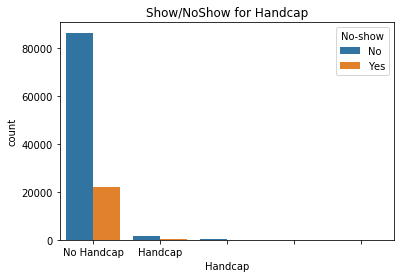

In [79]:
ax = sns.countplot(x='Handcap', hue='No-show', data=df)
ax.set_title("Show/NoShow for Handcap")
x_ticks_labels=['No Handcap', 'Handcap']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [19]:
df['Handcap'].value_counts().sum()

110526

In [20]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [61]:
cat = df[["Handcap", "No-show"]]

In [72]:
cat = cat[(cat['No-show'] == 'No')]
cat['Handcap'].value_counts()

0    86373
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64

> we see that areound 108k patients without handcap more than 85& attned their appointments so there is a relationship between handcap level and showing up.

### 9. we will check the SMS_received factor with showing up.


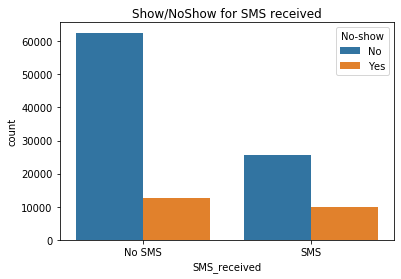

In [93]:
ax = sns.countplot(x='SMS_received', hue='No-show', data=df)
ax.set_title("Show/NoShow for SMS received")
x_ticks_labels=['No SMS','SMS']
ax.set_xticklabels(x_ticks_labels)
plt.show()

> We understand that abbout 75% patients that didnt receive a sms showed up while 60% of patients that recieved a sms showed up so there is a relationship between reciving a sms and showed up but its not that strong as this likly the opposite of the expected int he realworld.

<a id='conclusions'></a>
## Conclusions

> we see that  mostly of the patients that showing up are around from 30-40 years old , the women have more appointments  and attend their appoitnments more than men and from the above factors we can say that gender and age are the most important factor to predict if the patient will show up then Scholarship , Neighbourhood and Hipertension to help us to know better fi the patient will show up or not .